In [14]:
import pandas as pd

data = pd.read_csv('supervised_clustering_data_with_shap.csv')

In [15]:
data.columns

Index(['Cluster', 'f(x)', 'age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume',
       'vdcSurfaceArea', 'sacSectionArea', 'ellipsoidVolume',
       'ellipsoidMaxSemiaxis', 'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis',
       'sacCenterlineLength', 'ostiumSectionArea', 'ostiumSectionPerimeter',
       'ostiumMinSize', 'ostiumMaxSize', 'ostiumShapeFactor',
       'aspectRatio_star', 'sizeRatio_star', 'vesselDiameter',
       'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 'meanCurvature',
       'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 'maxCurvature',
       'maxTorsion', 'bifurcationAngleInPlane', 'bifurcationAngleOutOfPlane',
       'aneurysmLocation_MCA', 'aneurysmType_TER', 'aneurysmLocation',
       'aneurysmType', 'age.1', 'sacVolume.1', 'sacSurfaceArea.1',
       'vdcVolume.1', 'vdcSurfaceArea.1', 'sacSectionArea.1',
       'ellipsoidVolume.1', 'ellipsoidMaxSemiaxis.1', 'ellipsoidMidSemiaxis.1',
       'ellipsoidMinSemiaxis.1', 'sacCenterlineLength.1',
       'ost

TypeError: 'value' must be an instance of str or bytes, not a numpy.float64

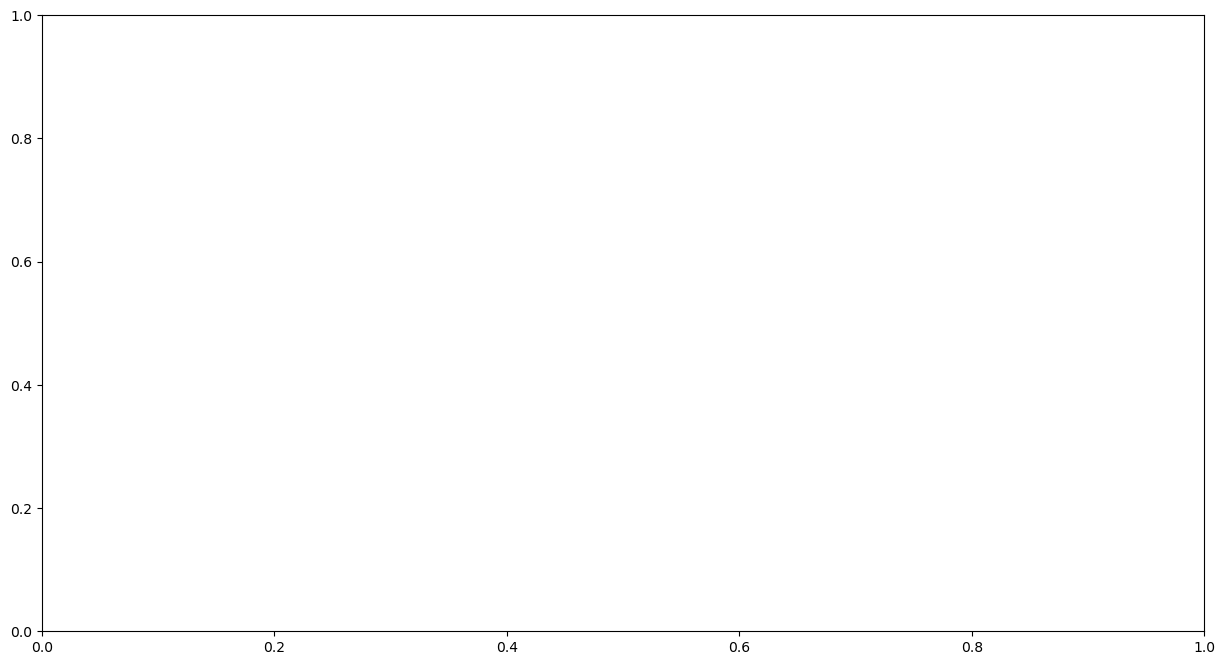

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Load the dataset
data = pd.read_csv('supervised_clustering_data_with_shap.csv')

# Separate SHAP values and features
shap_columns = [col for col in data.columns if not col.endswith('.1') and col not in ['Cluster', 'f(x)']]
feature_columns = [col for col in data.columns if col.endswith('.1')]

# Compute mean absolute SHAP values for each feature within each cluster
shap_df = data[['Cluster'] + shap_columns]
mean_shap_by_cluster = shap_df.groupby('Cluster').mean().T.reset_index()
mean_shap_by_cluster.rename(columns={'index': 'Feature'}, inplace=True)

# Ensure 'Cluster' is treated as a string for plotting
mean_shap_by_cluster.columns = mean_shap_by_cluster.columns.astype(str)

# Melt the DataFrame for parallel coordinates
melted_data = mean_shap_by_cluster.melt(id_vars='Feature', var_name='Cluster', value_name='Mean_SHAP_Value')

# Convert 'Cluster' column to string type
melted_data['Cluster'] = melted_data['Cluster'].astype(str)

# Parallel coordinates plot
plt.figure(figsize=(15, 8))
parallel_coordinates(melted_data, class_column='Cluster', colormap='viridis', alpha=0.8)
plt.title('Parallel Coordinates Plot of Mean SHAP Values by Cluster')
plt.ylabel('Mean |SHAP Value|')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


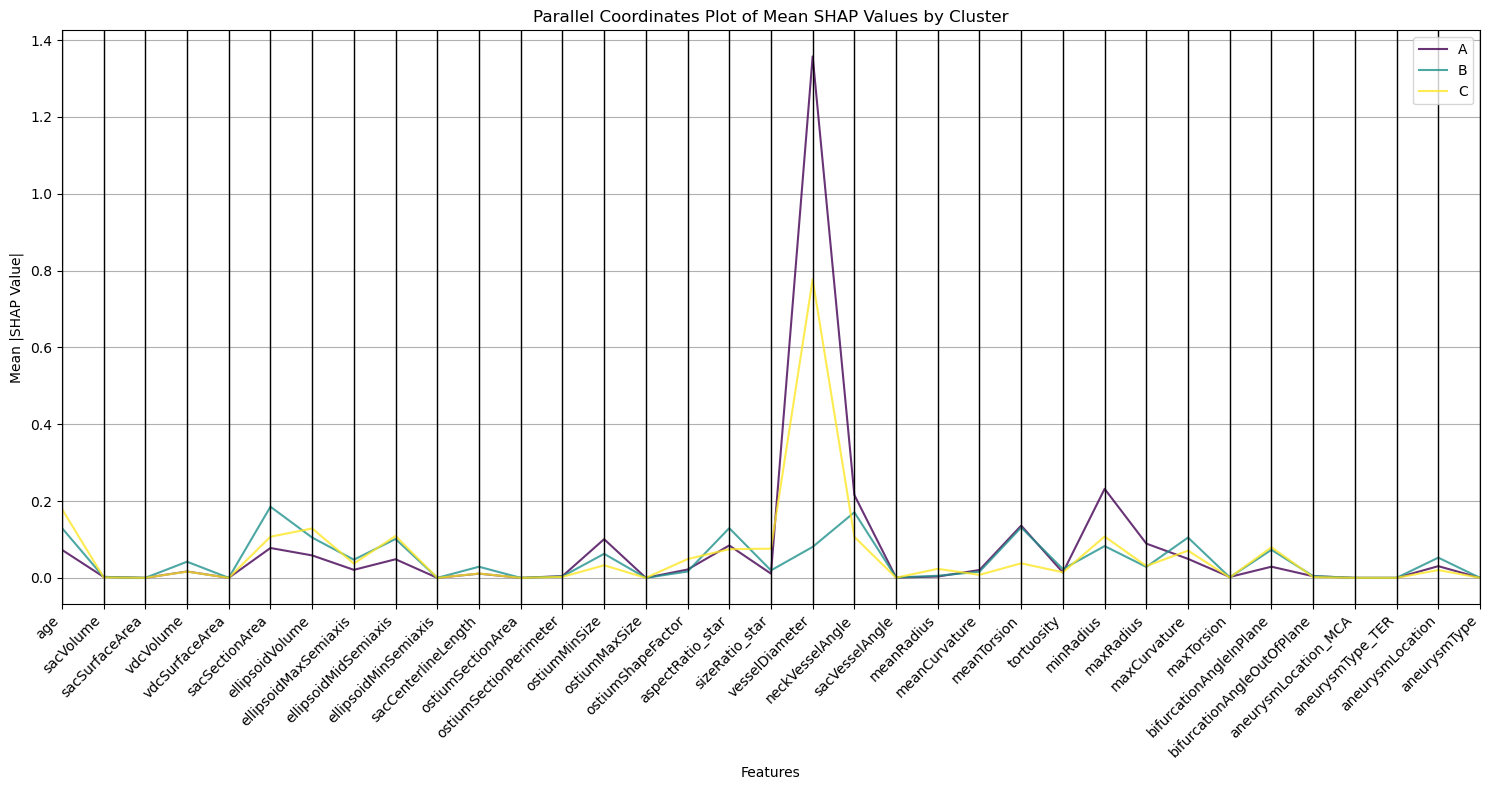

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Load the dataset
data = pd.read_csv('supervised_clustering_data_with_shap.csv')

# Separate SHAP values and clusters
shap_columns = [col for col in data.columns if not col.endswith('.1') and col not in ['Cluster', 'f(x)']]
shap_df = data[['Cluster'] + shap_columns]

# Compute mean absolute SHAP values for each feature within each cluster
mean_shap_by_cluster = shap_df.groupby('Cluster').apply(lambda x: x.abs().mean()).reset_index()

# Ensure the 'Cluster' column is categorical
mean_shap_by_cluster['Cluster'] = mean_shap_by_cluster['Cluster'].astype(str)

# Parallel coordinates plot
plt.figure(figsize=(15, 8))
parallel_coordinates(mean_shap_by_cluster, class_column='Cluster', colormap='viridis', alpha=0.8)
plt.title('Parallel Coordinates Plot of Mean SHAP Values by Cluster')
plt.ylabel('Mean |SHAP Value|')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


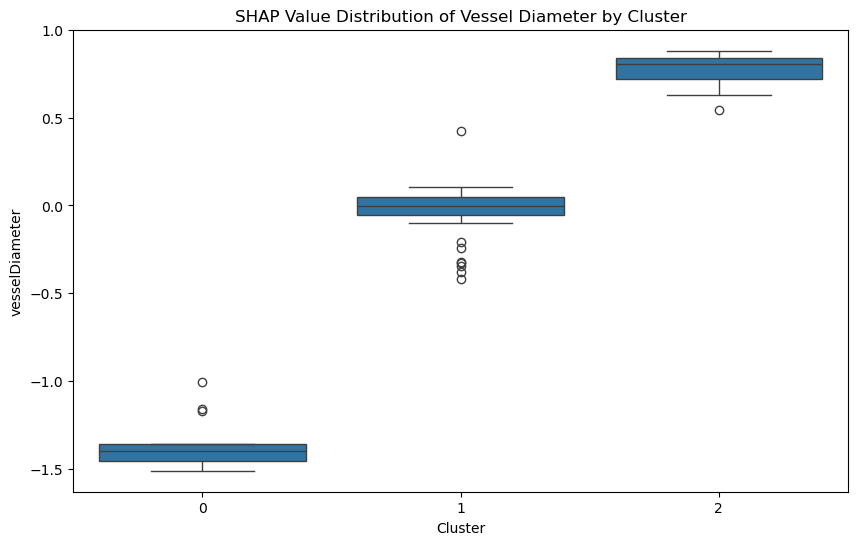

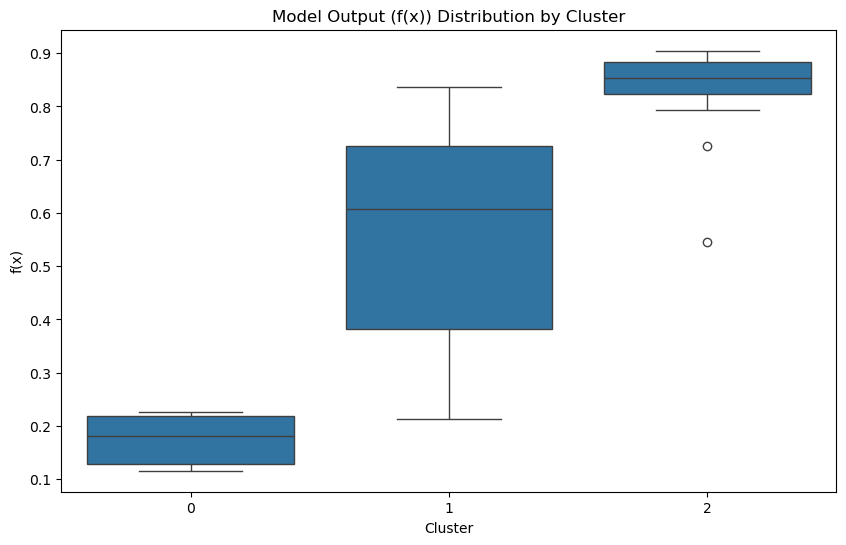

Cluster 2:
Cluster            2.000000
f(x)               0.836585
vesselDiameter     0.776844
neckVesselAngle    0.081077
sacSectionArea     0.106993
dtype: float64
Cluster 1:
Cluster            1.000000
f(x)               0.559753
vesselDiameter    -0.020021
neckVesselAngle   -0.002403
sacSectionArea    -0.038590
dtype: float64
Cluster 0:
Cluster            0.000000
f(x)               0.171554
vesselDiameter    -1.357327
neckVesselAngle   -0.133367
sacSectionArea    -0.004981
dtype: float64


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Simplify the dataset
selected_columns = ['Cluster', 'f(x)', 'vesselDiameter', 'neckVesselAngle', 'sacSectionArea']
df_simplified = data[selected_columns]

# Step 2: Summarize cluster characteristics
cluster_summary = df_simplified.groupby('Cluster').mean()

# Step 3: Visualize SHAP value distributions by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_simplified, x='Cluster', y='vesselDiameter')
plt.title('SHAP Value Distribution of Vessel Diameter by Cluster')
plt.show()

# Step 4: Compare f(x) by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_simplified, x='Cluster', y='f(x)')
plt.title('Model Output (f(x)) Distribution by Cluster')
plt.show()

# Step 5: Link clusters to SHAP values
for cluster in df_simplified['Cluster'].unique():
    print(f"Cluster {cluster}:")
    cluster_data = df_simplified[df_simplified['Cluster'] == cluster]
    mean_shap = cluster_data.mean()
    print(mean_shap)

# Step 6: Visualize specific samples (Optional)
# Use SHAP library for force plots


c:\Users\shrin\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


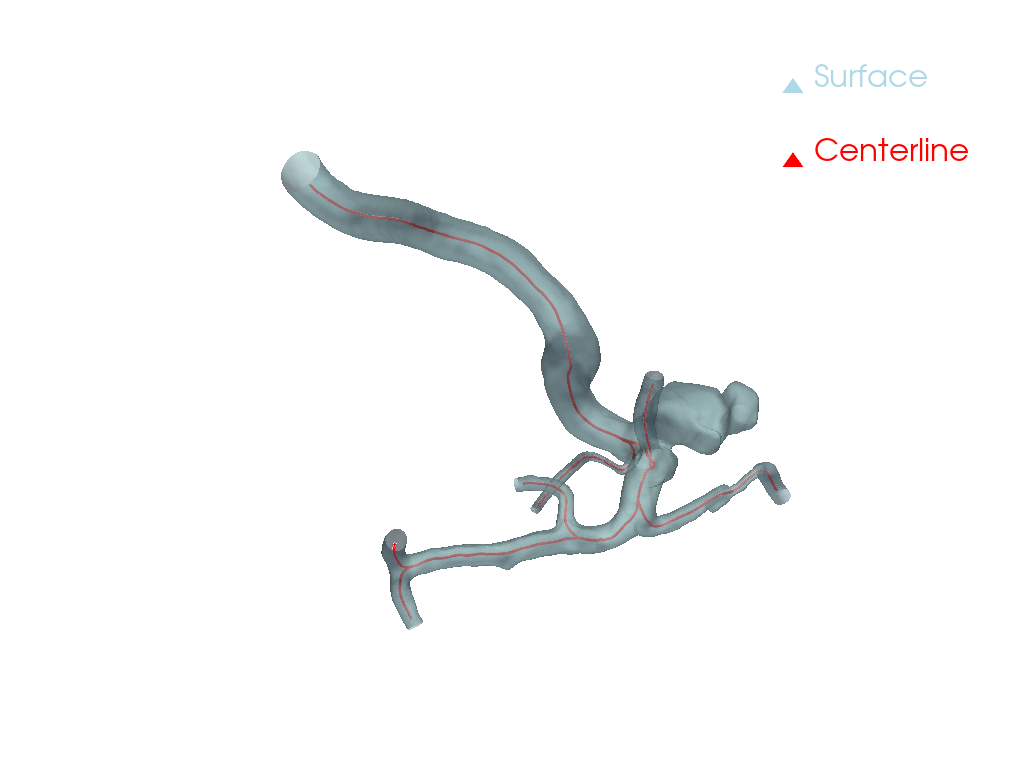

In [ ]:
import pyvista as pv
#############3 HIGH RISK
# Load the surface model
surface = pv.read("model2.vtp")  # or model.vtp

# Load the centerline
centerline = pv.read("centerlines2.vtp")

# Plot both together
plotter = pv.Plotter()
plotter.add_mesh(surface, color="lightblue", opacity=0.7, label="Surface")
plotter.add_mesh(centerline, color="red", line_width=3, label="Centerline")
plotter.add_legend()
plotter.show()


c:\Users\shrin\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


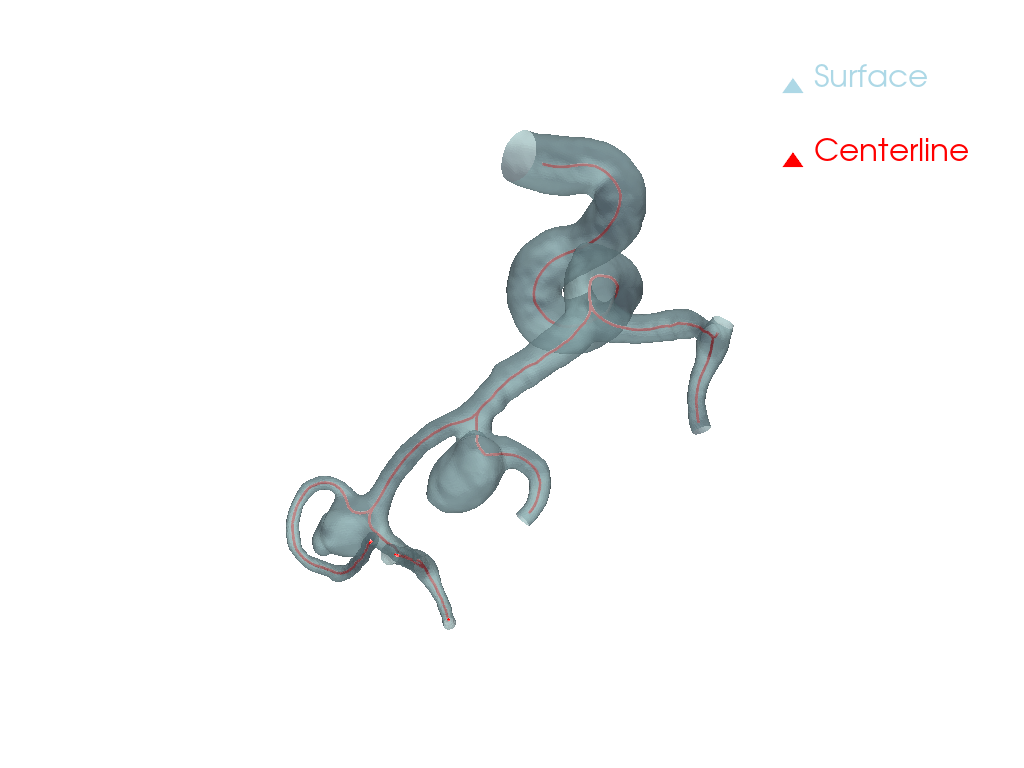

In [11]:
import pyvista as pv
################### NO RISK
# Load the surface model
surface = pv.read("model0.vtp")  # or model.vtp

# Load the centerline
centerline = pv.read("centerlines0.vtp")

# Plot both together
plotter = pv.Plotter()
plotter.add_mesh(surface, color="lightblue", opacity=0.7, label="Surface")
plotter.add_mesh(centerline, color="red", line_width=3, label="Centerline")
plotter.add_legend()
plotter.show()
